In [85]:
import numpy as np
import pandas as pd

In [86]:
df= pd.read_excel("D:\Python\database.xlsx")

In [87]:
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Quantity
0,A32,2019-07-10,23.0,23.0,22.0,22.0,2600
1,A32,2019-07-11,22.5,23.3,22.3,23.3,11100
2,A32,2019-07-16,22.4,23.5,22.4,23.5,333
3,A32,2019-07-18,23.5,23.5,23.5,23.5,500
4,A32,2019-07-26,23.1,23.1,23.1,23.1,100


In [88]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
IQR



117180.0

In [89]:
df.shape

(35781, 7)

In [90]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

In [91]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name]< fence_high)]
    return df_out

In [113]:
df1 = remove_outlier(df, "Quantity")
df1

,Ticker,Date/Time,Open,High,Low,Close,Quantity
0,A32,2019-07-10,23.00,23.00,22.00,22.00,2600
1,A32,2019-07-11,22.50,23.30,22.30,23.30,11100
2,A32,2019-07-16,22.40,23.50,22.40,23.50,333
3,A32,2019-07-18,23.50,23.50,23.50,23.50,500
4,A32,2019-07-26,23.10,23.10,23.10,23.10,100
5,A32,2019-07-29,24.00,24.00,24.00,24.00,100
6,A32,2019-07-30,24.00,24.00,24.00,24.00,33
7,A32,2019-07-31,23.50,23.50,23.50,23.50,200
8,A32,2019-08-01,24.00,24.00,24.00,24.00,400
9,A32,2019-08-02,24.30,24.30,24.30,24.30,100


In [93]:
df1.describe()

,Open,High,Low,Close,Quantity
count,30360.000000,30360.000000,30360.000000,30360.00000,30360.000000
mean,20.162891,20.456963,19.852872,20.19772,36976.156390
std,24.462899,24.749227,24.078337,24.43827,63475.683543
min,0.000000,0.000000,0.000000,0.02000,1.000000
25%,6.600000,6.700000,6.500000,6.60000,600.000000
50%,13.100000,13.300000,12.950000,13.10000,5450.000000
75%,24.500000,24.900000,24.100000,24.59250,41200.000000
max,284.370000,289.340000,284.370000,287.35000,293860.000000


In [ ]:
df1.to_csv("F:\Data\databaseclean.csv")

In [94]:
df.describe()

,Open,High,Low,Close,Quantity
count,35781.000000,35781.000000,35781.000000,35781.000000,3.578100e+04
mean,22.027945,22.336574,21.706150,22.062184,4.076659e+05
std,42.704050,42.976024,42.391683,42.695671,4.824212e+06
min,0.000000,0.000000,0.000000,0.020000,1.000000e+00
25%,6.750000,6.900000,6.600000,6.800000,1.000000e+03
50%,13.820000,14.000000,13.600000,13.900000,1.120000e+04
75%,25.000000,25.300000,24.700000,25.000000,1.181800e+05
max,1001.460000,1002.770000,993.230000,997.940000,1.676708e+08


In [95]:
import seaborn as sns

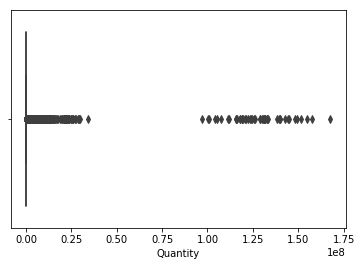

In [96]:
sns.boxplot(x=df['Quantity'])


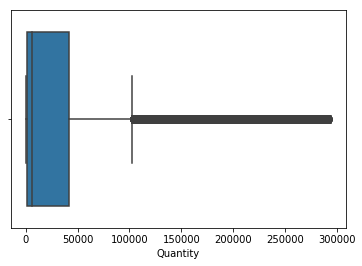

In [97]:
sns.boxplot(x=df1['Quantity'])

In [98]:
x1 = pd.Series(df['Quantity']) # with outliers
x2 = df.loc[df['Quantity'].between(df['Quantity'].quantile(.25), df['Quantity'].quantile(.75))] # without outliers

In [99]:
x1

0           2600
1          11100
2            333
3            500
4            100
5            100
6             33
7            200
8            400
9            100
10          1120
11          1100
12           100
13           300
14            30
15           800
16           800
17           500
18           200
19           100
20           500
21       6069130
22       4733210
23       3409430
24       2186070
25       2892050
26       5570050
27       3427670
28       3109160
29       3457990
          ...   
35751      89340
35752      98570
35753      78750
35754     111090
35755     146470
35756      56350
35757      77870
35758      70620
35759      28360
35760      39250
35761      33850
35762      20920
35763      26180
35764       9710
35765      27340
35766      72150
35767      23060
35768      38430
35769       6730
35770      21430
35771     174570
35772     129520
35773      78540
35774     150430
35775     165830
35776     276390
35777      40000
35778        1

In [100]:
x2

,Ticker,Date/Time,Open,High,Low,Close,Quantity
0,A32,2019-07-10,23.00,23.00,22.00,22.00,2600
1,A32,2019-07-11,22.50,23.30,22.30,23.30,11100
10,A32,2019-08-05,23.50,25.00,23.50,25.00,1120
11,A32,2019-08-07,23.50,25.00,23.50,25.00,1100
65,AAM,2019-07-10,11.65,11.90,11.00,11.90,5530
67,AAM,2019-07-12,11.60,11.90,11.60,11.65,12220
68,AAM,2019-07-15,11.65,11.65,11.45,11.50,2930
69,AAM,2019-07-16,11.50,11.50,11.40,11.50,3150
70,AAM,2019-07-17,11.50,11.50,11.25,11.50,1940
71,AAM,2019-07-18,11.65,11.70,11.25,11.40,12620


In [101]:
df2 = df[['Quantity', 'Ticker']]

In [102]:
df_group = df2.groupby(['Ticker'], as_index = False).mean()

In [103]:
df_group

,Ticker,Quantity
0,A32,1.000762e+03
1,AAA,2.709489e+06
2,AAM,2.315814e+03
3,AAV,2.271821e+05
4,ABC,2.556311e+04
5,ABI,1.003432e+04
6,ABR,6.264189e+03
7,ABT,4.700000e+02
8,ACB,1.319425e+06
9,ACC,7.250000e+02


In [104]:
result = []
for index,row in df.iterrows(): 
    if row["Ticker"] == "TTF": 
        result.append(row)

In [105]:
result

[Ticker                       TTF
 Date/Time    2019-07-10 00:00:00
 Open                        3.29
 High                        3.33
 Low                         3.26
 Close                       3.26
 Quantity                  705670
 Name: 30328, dtype: object, Ticker                       TTF
 Date/Time    2019-07-11 00:00:00
 Open                         3.3
 High                        3.33
 Low                         3.23
 Close                        3.3
 Quantity                 1233610
 Name: 30329, dtype: object, Ticker                       TTF
 Date/Time    2019-07-12 00:00:00
 Open                         3.3
 High                        3.33
 Low                         3.24
 Close                       3.24
 Quantity                  863830
 Name: 30330, dtype: object, Ticker                       TTF
 Date/Time    2019-07-15 00:00:00
 Open                         3.3
 High                        3.27
 Low                         3.22
 Close                       3.2

In [117]:
res_df = df[df['Ticker'] == "HD2"]

In [118]:
remove_outlier(res_df,"Quantity")

,Ticker,Date/Time,Open,High,Low,Close,Quantity
11847,HD2,2019-07-10,7.8,7.8,7.8,7.8,100
11848,HD2,2019-07-12,8.1,8.1,8.1,8.1,100
11849,HD2,2019-07-15,7.9,7.9,7.9,7.9,2000
11850,HD2,2019-07-16,7.9,7.9,7.9,7.9,300
11851,HD2,2019-07-17,8.0,8.1,8.0,8.1,2400
11852,HD2,2019-07-18,8.2,8.2,8.2,8.2,400
11853,HD2,2019-07-19,8.2,8.2,8.2,8.2,3500
11854,HD2,2019-07-23,7.3,7.6,7.3,7.6,1100
11855,HD2,2019-07-24,8.0,8.0,8.0,8.0,1000
11856,HD2,2019-07-30,7.4,7.4,7.4,7.4,100


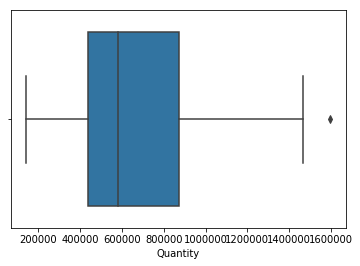

In [108]:
sns.boxplot(x=res_df["Quantity"])

In [109]:
remove_ticker = [n for n in df["Ticker"]]

In [110]:
my_set = set(df["Ticker"])
my_set

{'HD2',
 'SCI',
 'LHG',
 'SBT',
 'YBC',
 'ILS',
 'ANV',
 'KOS',
 'ND2',
 'HII',
 'X20',
 'LIC',
 'MTA',
 'DRL',
 'TOP',
 'VPC',
 'MCP',
 'TVC',
 'MEG',
 'FOC',
 'PGT',
 'PIS',
 'SNZ',
 'NBT',
 'PGD',
 'SSC',
 'NBC',
 'BMC',
 'HID',
 'TPC',
 'TIX',
 'VPH',
 'MTV',
 'SHA',
 'ITA',
 'KST',
 'GTD',
 'NCS',
 'KDF',
 'VCA',
 'HPM',
 'D11',
 'CMW',
 'DTK',
 'VC2',
 'NAS',
 'HHS',
 'BT1',
 'BBS',
 'DHM',
 'TV2',
 'BBT',
 'DAG',
 'ATB',
 'AFC',
 'TCB',
 'FTS',
 'TMT',
 'VKC',
 'BHK',
 'HAN',
 'TTV',
 'BTB',
 'QNS',
 'BMJ',
 'DCM',
 'C4G',
 'BVN',
 'VGR',
 'TTG',
 'VTC',
 'HDB',
 'MCF',
 'HTE',
 'CNH',
 'PVE',
 'VNH',
 'SJE',
 'KHP',
 'HAH',
 'MGG',
 'PMT',
 'FTM',
 'S4A',
 'VTH',
 'HAF',
 'PPE',
 'HTP',
 'VNF',
 'TAG',
 'ILB',
 'CLL',
 'BVG',
 'HMH',
 'VSF',
 'CTI',
 'HAG',
 'CIA',
 'DQC',
 'DMC',
 'VGV',
 'SMC',
 'MTG',
 'PPS',
 'DNY',
 'BRC',
 'TIG',
 'LCG',
 'MBG',
 'VDS',
 'PSE',
 'TNP',
 'IBC',
 'GMC',
 'TRS',
 'LGC',
 'VGT',
 'BLI',
 'HUG',
 'DAD',
 'TC6',
 'NBE',
 'NCP',
 'HPP',
 'VCB',


In [124]:
final_df = pd.DataFrame(columns = ["Ticker", "Date/Time", "Open","High","Low","Close","Quantity"])
for r in my_set:
    res_df1 = df[df['Ticker'] == r]
    res_df2 = remove_outlier(res_df1, "Quantity")
    final_df = final_df.append(res_df2)
    

In [125]:
final_df

,Ticker,Date/Time,Open,High,Low,Close,Quantity
11847,HD2,2019-07-10,7.8,7.8,7.8,7.8,100
11848,HD2,2019-07-12,8.1,8.1,8.1,8.1,100
11849,HD2,2019-07-15,7.9,7.9,7.9,7.9,2000
11850,HD2,2019-07-16,7.9,7.9,7.9,7.9,300
11851,HD2,2019-07-17,8.0,8.1,8.0,8.1,2400
11852,HD2,2019-07-18,8.2,8.2,8.2,8.2,400
11853,HD2,2019-07-19,8.2,8.2,8.2,8.2,3500
11854,HD2,2019-07-23,7.3,7.6,7.3,7.6,1100
11855,HD2,2019-07-24,8.0,8.0,8.0,8.0,1000
11856,HD2,2019-07-30,7.4,7.4,7.4,7.4,100


In [128]:
final_df.to_csv("D:\Python\databaseclean1.csv")